## Exploring the Freelance AI Job Market: A Data Story
As an AI student navigating the vast freelancing job market, I embarked on a journey to uncover trends, demands, and insights from real job postings. Instead of just showing graphs, this notebook tells a story—around skills, locations, salaries, and evolving roles from freelancers's point of view and company's—aiming to guide learning and career decisions with data-backed evidence.

### Approach at a Glance
This exploration uses scraped job posting data from freelancing platforms to decode market demands. The journey includes data cleaning, data preparation, skill extraction, title normalization, and analysis by job type, location, experience, and pay trends.

Through visual and narrative insights, I will highlight what skills shine, where opportunities lie, and how roles are evolving in the AI job landscape.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
jobs = pd.read_csv("AI_freelance_jobs.csv",index_col = False)
jobs.head()

,title,location,budget,job_type,experience,rating,skills,page
0,Staff/Senior Software Engineer – Applied AI (H...,United States,$70.00,Hourly,Expert,5.0,"Artificial Intelligence, Python, API, Machine ...",1
1,Expert AI/ML Engineer Needed for LLM Project D...,United States,$30.00,Hourly,Expert,5.0,"Python, Machine Learning, Artificial Intellige...",1
2,"Senior Backend Engineer – Queue/Scheduler, Tel...",United States,$20.00,Hourly,Expert,5.0,"MongoDB, Python, Node.js, Celery, API, Twilio ...",1
3,AI Engineer Needed for Cloud Infrastructure Pl...,Pakistan,NaN,Hourly,Intermediate,NaN,"Artificial Intelligence, Python, Google Cloud ...",1
4,Senior AI Engineer & Automation Specialist,United States,$30.00,Fixed-price,Intermediate,5.0,"Machine Learning, Artificial Intelligence, Dat...",1


In [3]:
freelancers = pd.read_csv("AI_Freelancers_scored.csv",index_col = False)
freelancers.head()

,ID,location,budget,total_earnings,total_jobs,total_hours,skills,associated with company,company name,description,page,marketing_score
0,~0152599b36414e1111,India,$25.00/hr,$200K+,92,"14,221","AI Bot, AI Chatbot, AI Development, AI Text-to...",yes,Excellence Technologies Pvt. Ltd. - Leading So...,𝗧𝗼𝗽 𝗥𝗮𝘁𝗲𝗱 𝗔𝗜 𝗘𝗻𝗴𝗶𝗻𝗲𝗲𝗿 & 𝗙𝘂𝗹𝗹-𝗦𝘁𝗮𝗰𝗸 𝗗𝗲𝘃𝗲𝗹𝗼𝗽𝗲𝗿 |...,1,8.0
1,~018df91fc406df4fa8,India,$25.00/hr,$3K+,5,60,"AI Agent Development, OpenAI API, LLM Prompt, ...",yes,VKAPS IT Solutions Pvt. Ltd.,I engineer production-grade AI systems that th...,1,9.0
2,~01fee9ab65b45dfa94,Pakistan,$10.00/hr,$8K+,15,709,"AI Content Creation, AI Text-to-Image, AI-Gene...",no,NaN,🌟 Hello! I'm Your Ultimate AI Expert for Creat...,1,7.0
3,~0178ed5ff15b50300f,Morocco,$45.00/hr,$4K+,36,21,"AI Image Editing, AI Text-to-Image, AI Text-to...",no,NaN,✨ TRANSFORM YOUR IDEAS INTO STUNNING VISUAL RE...,1,6.0
4,~01af4cc133cdcb99b3,Ukraine,$45.00/hr,$30K+,10,269,"AI Agent Development, ChatGPT, ChatGPT API, AI...",yes,AVOX,Hi 👋\n\nI am an experienced developer with a p...,1,5.0


## Data Exploration

Before diving into skills, salaries, and career patterns, it’s important to pause and get familiar with the dataset itself.  
Every story begins with understanding the raw material, and here the raw material is job postings, freelancer's profiles scraped from freelancing platforms.  

By exploring the structure of the data — the number of rows and columns, which fields are complete or missing, and the distribution of key features — I’m essentially mapping the landscape before analyzing it.  

This step answers questions like:  
- How big is the dataset I’m working with?  
- Which columns are rich and reliable, and which have gaps?  
- How are different features (like `title`, `skills`, `salary`, `experience_level`, and `payment_type`) represented?  



#### Dataset Size 
The first step in exploring the AI freelance job market is to understand how much information we actually have.  
By checking the number of rows and columns, I’m essentially asking: *“How many job postings are captured, and how many features describe them?”*  

This tells me whether I’m working with a broad, diverse dataset or something smaller and more niche.

In [4]:
jobs.shape

(300, 8)

In [5]:
freelancers.shape

(499, 12)

*The dataset contains **300 rows x 8 columns job postings** , **499 rows x 11 column of freelancers profiles**, which means I have 300 job postings described by 8 features , 499 Freelancer profile descriped by 11 feature. This gives me enough breadth to spot real market patterns.*  

#### Column Overview & Missing Data  

Next, I look at the dataset’s schema — what type of data each column holds, and how complete it is.  
Do most jobs list salaries? Do they all have titles, skills, and locations? Or are there gaps that I need to handle carefully? Does freelacers list their earnings? What is a must to put in a profile and What does they leave out?   

This check helps me avoid blind spots later: if a column has lots of missing values, I can’t treat it as a reliable signal.  


In [6]:
jobs.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       296 non-null    object 
 1   location    299 non-null    object 
 2   budget      282 non-null    object 
 3   job_type    264 non-null    object 
 4   experience  299 non-null    object 
 5   rating      194 non-null    float64
 6   skills      298 non-null    object 
 7   page        300 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 18.9+ KB


*Some columns, like `title` and `payment_type`, are well-populated. Others, like `rating` or `job_type`, may have gaps.  
Knowing this upfront lets me decide where to trust the data fully and where to handle missing values thoughtfully.*  


In [7]:
freelancers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       499 non-null    object 
 1   location                 491 non-null    object 
 2   budget                   497 non-null    object 
 3   total_earnings           499 non-null    object 
 4   total_jobs               488 non-null    object 
 5   total_hours              376 non-null    object 
 6   skills                   492 non-null    object 
 7   associated with company  499 non-null    object 
 8   company name             231 non-null    object 
 9   description              498 non-null    object 
 10  page                     499 non-null    int64  
 11  marketing_score          499 non-null    float64
dtypes: float64(1), int64(1), object(10)
memory usage: 46.9+ KB


*Here also some columns, like `total_earnings` and `budget`, are well-populated. Others, like `company_name` or `total_hours`.*  

#### Null Value Counts  

To be more precise, I count the exact number of missing vs non-missing values in each feature.  
This gives me a clearer picture of how strong each signal is in the dataset.  


In [8]:
jobs.isna().sum()

title           4
location        1
budget         18
job_type       36
experience      1
rating        106
skills          2
page            0
dtype: int64

*Columns with high null counts (for example, `job_type` or `rating`) highlight areas where not all clients share complete info.  
This reflects real-world freelancing platforms: not every posting gives full details, and freelancers must often make decisions with partial informatiom.*  


In [9]:
freelancers.isna().sum()

ID                           0
location                     8
budget                       2
total_earnings               0
total_jobs                  11
total_hours                123
skills                       7
associated with company      0
company name               268
description                  1
page                         0
marketing_score              0
dtype: int64

*Here columns with null values shows what freelancer focus on and what doen't matter. (for example,`skills`) is almost a must no freelancers leave it out.*

## Data Preparation  

If data exploration was about *getting to know the landscape*, then data preparation is about *making the road walkable*.  
This is the stage where raw, messy job postings - freelancer profiles are transformed into a structured dataset that can actually tell a story.  

For me, this is the most important part of the entire workflow:  
- Removing unnecessary columns and rows keeps the focus on signals that matter.  
- Renaming columns makes the dataset human-readable and analysis-ready.  
- Cleaning column structures (for example, converting `salary` into integers) ensures that numbers behave like numbers, not strings.  

**Why this matters :** A messy dataset hides patterns, but a clean one reveals them.  
If this section is done well, everything that follows — salary analysis, skill demand, experience trends — becomes clearer, more reliable, and more actionable.  


In [10]:
jobs = jobs.drop( 'page' , axis = 1)
freelancers = freelancers.drop( 'page' , axis = 1)
freelancers = freelancers.drop( 'company name' , axis = 1)

#### Renaming Columns for Clarity  
Column names should be human-readable and self-explanatory.  
I renamed in job postings:  
- `budget` → `salary`  
- `experience` → `experience_level`  
- `job_type` → `payment_type`
In freelancer profiles:
- `budget` → `rate_per-hour`
- `associated with company` → `is_associated_with_company`
- 
This makes later plots and insights easier to follow.  

In [11]:
jobs = jobs.rename(columns={'budget' : 'salary' , 'experience' : 'experience_level' , 'job_type' : 'payment_type'})
freelancers = freelancers.rename(columns={'budget':'rate_per_hour' , 'associated with company':'is_associated_with_company'})

#### Cleaning Job Titles  
Many titles contain long strings of unnecessary detail.  
To simplify, I extract the portion before the word *Engineer* — so instead of messy text, we keep consistent, comparable job titles.  


In [12]:
jobs['title'] = jobs['title'].str.extract(r'(.*?Engineer)')

#### Cleaning and Converting Data types  
The salary columns originally contained symbols (`$`) and extra text, making it unusable for numeric analysis.  

Steps taken:  
1. Remove currency symbols and text.  
2. Extract the numeric portion.  
3. Convert it from object type to integer (`Int64`).  

Now salaries behave like numbers, which allows us to calculate averages, distributions, and comparisons.  

also some numeric columns were treated as object had to be converted

In [13]:
def clean_earnings(val):
    if pd.isna(val):
        return 0
    val = str(val).upper().replace("$", "").replace("+", "").strip()
    if "K" in val:
        return int(float(val.replace("K", "")) * 1000)
    elif "M" in val:
        return int(float(val.replace("M", "")) * 1_000_000)
    else:
        return int(float(val)) if val.isdigit() else 0


freelancers['total_earnings'] = freelancers['total_earnings'].apply(clean_earnings)

*Total earnings column has to be normalized because some rows has K symbol which mean thousand and some contain M which means million so removing them means false data , converting types from string to integer.*

In [14]:
# Fix for salary columns (your existing code)
jobs['salary'] = jobs['salary'].str.split(r'(\d+)', expand=False).str[1]
jobs['salary'] = jobs['salary'].astype('Int64')

freelancers['rate_per_hour'] = freelancers['rate_per_hour'].str.split(r'(\d+)', expand=False).str[1]
freelancers['rate_per_hour'] = freelancers['rate_per_hour'].astype('Int64')

# Fix for columns with commas - handle different data types
def clean_and_convert_to_int(series):
    """Convert series to Int64, handling commas if present"""
    if series.dtype == 'object':  # String-like data
        return series.str.replace(',', '').astype('Int64')
    else:  # Already numeric
        return series.astype('Int64')

freelancers['total_earnings'] = clean_and_convert_to_int(freelancers['total_earnings'])
freelancers['total_jobs'] = clean_and_convert_to_int(freelancers['total_jobs'])
freelancers['total_hours'] = clean_and_convert_to_int(freelancers['total_hours'])

In [15]:
freelancers.head()

,ID,location,rate_per_hour,total_earnings,total_jobs,total_hours,skills,is_associated_with_company,description,marketing_score
0,~0152599b36414e1111,India,25,200000,92,14221,"AI Bot, AI Chatbot, AI Development, AI Text-to...",yes,𝗧𝗼𝗽 𝗥𝗮𝘁𝗲𝗱 𝗔𝗜 𝗘𝗻𝗴𝗶𝗻𝗲𝗲𝗿 & 𝗙𝘂𝗹𝗹-𝗦𝘁𝗮𝗰𝗸 𝗗𝗲𝘃𝗲𝗹𝗼𝗽𝗲𝗿 |...,8.0
1,~018df91fc406df4fa8,India,25,3000,5,60,"AI Agent Development, OpenAI API, LLM Prompt, ...",yes,I engineer production-grade AI systems that th...,9.0
2,~01fee9ab65b45dfa94,Pakistan,10,8000,15,709,"AI Content Creation, AI Text-to-Image, AI-Gene...",no,🌟 Hello! I'm Your Ultimate AI Expert for Creat...,7.0
3,~0178ed5ff15b50300f,Morocco,45,4000,36,21,"AI Image Editing, AI Text-to-Image, AI Text-to...",no,✨ TRANSFORM YOUR IDEAS INTO STUNNING VISUAL RE...,6.0
4,~01af4cc133cdcb99b3,Ukraine,45,30000,10,269,"AI Agent Development, ChatGPT, ChatGPT API, AI...",yes,Hi 👋\n\nI am an experienced developer with a p...,5.0


In [16]:
jobs.head()

,title,location,salary,payment_type,experience_level,rating,skills
0,Staff/Senior Software Engineer,United States,70,Hourly,Expert,5.0,"Artificial Intelligence, Python, API, Machine ..."
1,Expert AI/ML Engineer,United States,30,Hourly,Expert,5.0,"Python, Machine Learning, Artificial Intellige..."
2,Senior Backend Engineer,United States,20,Hourly,Expert,5.0,"MongoDB, Python, Node.js, Celery, API, Twilio ..."
3,AI Engineer,Pakistan,<NA>,Hourly,Intermediate,NaN,"Artificial Intelligence, Python, Google Cloud ..."
4,Senior AI Engineer,United States,30,Fixed-price,Intermediate,5.0,"Machine Learning, Artificial Intelligence, Dat..."


## Data Plotting  

This section is where the story of the AI freelance market really comes alive.  
Just like any newcomer stepping into freelancing (including myself), I had a set of burning questions:  

-  **Where are the opportunities?** Which countries (and remote jobs) dominate the market?  
-  **How much can I expect to earn?** Which countries offer the highest salaries, and how does pay differ between hourly and fixed-price work?  
-  **What do clients want?** Which skills are most in demand, and are companies looking for seasoned experts only — or is there room for beginners too?  
-  **Do ratings matter?** Do higher-rated companies lean toward fixed or hourly contracts?
-  **What are the important skills?** are there essentital skills that are must to have?

To answer these, I included more 10+ visualizations — not to overwhelm, but because I didn’t want to miss anything important in the data.  
Every chart is a different piece of the puzzle, and together they form a complete picture of how the freelance AI job market works.  

 **Why this matters:** As someone mapping my own next steps in freelancing, each of these plots is like a signpost. They help me (and hopefully others too) see where the opportunities are, what skills to sharpen, and what career paths look like in practice.  


## 🌍 Geographic Opportunities  

Freelancing may be borderless, but geography still shapes opportunity.  
To understand the global market, I explored **five questions**:  

1. **Where are the jobs coming from?** (Top countries by job postings)  
2. **Where are the freelancers?** (Top freelancer locations)  
3. **Which countries pay the most?** (Company-offered budgets)  
4. **Which freelancers are most expensive?** (Freelancer hourly rates by country)  
5. **Which clients are the best to work with?** (Average company ratings by country)  

Each question uncovers a different angle of geography’s role in freelancing:  
- Some countries dominate **demand** (lots of job postings).  
- Others dominate **supply** (lots of freelancers competing).  
- The highest salaries don’t always come from the countries with the most jobs.  
- High-rated clients don’t always pay the highest budgets.  

📌 **Takeaway:** For freelancers, geography is about **trade-offs**. The US and India may lead in volume, but the best opportunities often lie in the intersection of **high pay, high ratings, and balanced competition**.  


#### Where are the jobs coming from? 

The first question for any freelancer is simple: *which countries are posting the most jobs?*  
By looking at the distribution of postings, we see whether freelancing demand is concentrated in specific markets or more evenly spread. 

#### Where are the freelancers located? 

Jobs are only half of the equation — supply also matters.  
So I looked at the **top freelancer locations** to see whether freelancers are concentrated in the same markets as the job postings, or if there are mismatches.  


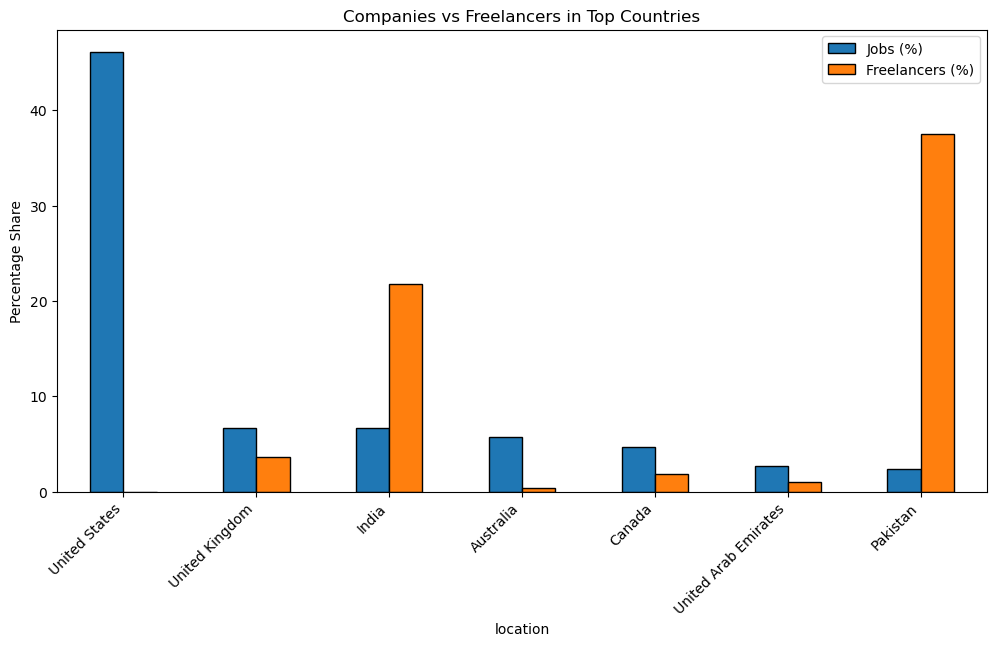

In [17]:
import pycountry
def normalize_country(name):
    try:
        country = pycountry.countries.lookup(name)
        return country.name
    except LookupError:
        return name 

jobs['location'] = jobs['location'].apply(normalize_country)

top_countries_jobs = jobs['location'].value_counts(normalize=True).head(7) * 100

# Freelancer supply (profiles dataset)
top_countries_freelancers = freelancers['location'].value_counts(normalize=True).reindex(top_countries_jobs.index) * 100

# Combine into one dataframe
compare_geo = pd.DataFrame({
    "Jobs (%)": top_countries_jobs,
    "Freelancers (%)": top_countries_freelancers
})

# Plot side-by-side bars
compare_geo.plot(kind="bar", figsize=(12,6), edgecolor="black")
plt.title("Companies vs Freelancers in Top Countries")
plt.ylabel("Percentage Share")
plt.xticks(rotation=45, ha="right")

plt.show()


-Most opportunities are concentrated in the US, UK, and India, with remote roles also ranking high. This shows that while freelancing is accessible worldwide, the bulk of demand comes from a few major markets.  

-Countries like India have a disproportionately high number of freelancers compared to postings, which signals high competition. In contrast, some countries have more job demand than local freelancer supply, which could be an opportunity for remote workers.  

#### Which countries pay the most? 
Not all jobs are equal — some markets pay significantly more.  
By analyzing **average company budgets** (hourly), we can see where the financial upside lies and whether contract type matters by country.  

#### Which freelancers are the most expensive?  

Company budgets show what clients are willing to pay — but freelancers also set their own expectations.  
Looking at **average freelancer hourly rates by country** reveals where freelancers price themselves highest.  


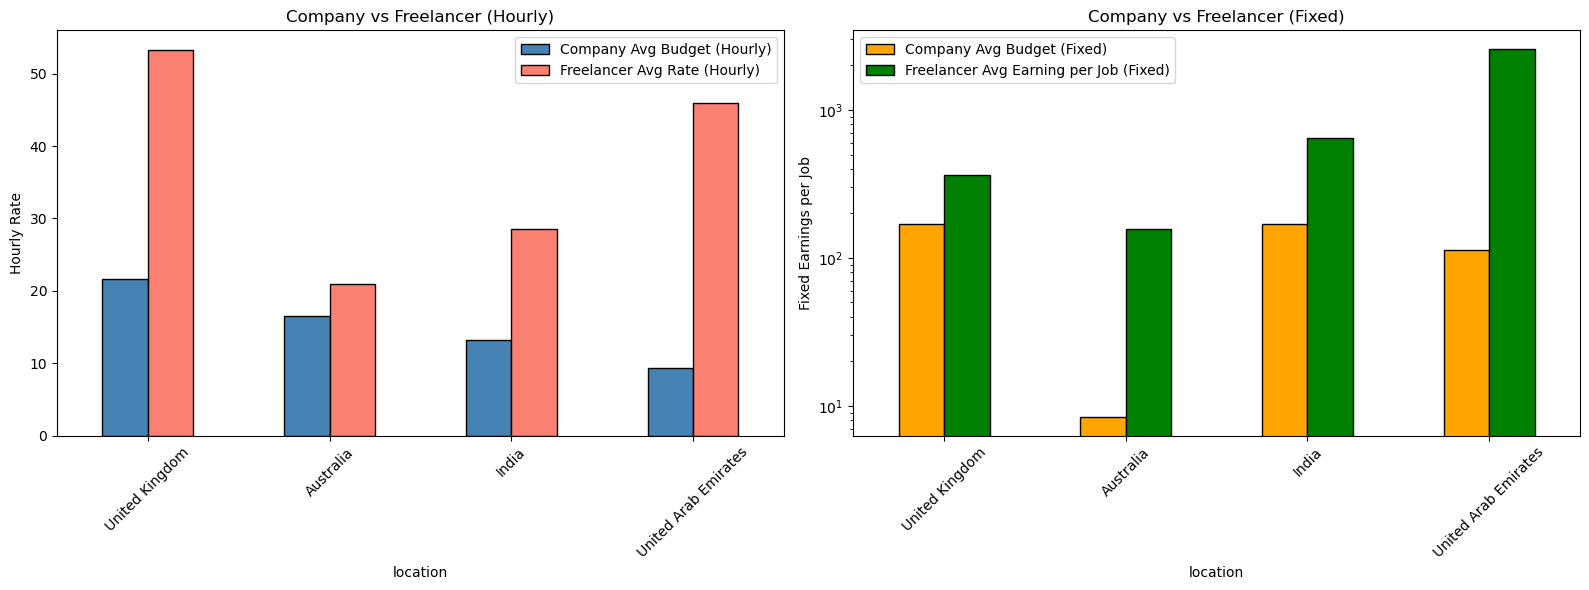

In [18]:
hourly_locations = jobs[jobs['payment_type'] == 'Hourly'].dropna(subset=['location'])
hourly_counts = hourly_locations['location'].value_counts()
hourly_locations = hourly_locations[hourly_locations['location'].isin(hourly_counts[hourly_counts > 2].index)]

fixed_locations = jobs[jobs['payment_type'] == 'Fixed-price'].dropna(subset=['location'])
fixed_counts = fixed_locations['location'].value_counts()
fixed_locations = fixed_locations[fixed_locations['location'].isin(fixed_counts[fixed_counts > 2].index)]

# Company average budgets
company_hourly = hourly_locations.groupby('location')['salary'].mean()
company_fixed = fixed_locations.groupby('location')['salary'].mean()

# Freelancer averages
freelancer_hourly = freelancers.groupby('location')['rate_per_hour'].mean()

# Compute freelancer average fixed earning per job
freelancers['avg_fixed_per_job'] = freelancers['total_earnings'] / freelancers['total_jobs']
freelancer_fixed = freelancers.groupby('location')['avg_fixed_per_job'].median()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

compare_df = pd.DataFrame({
    "Company Avg Budget (Hourly)": company_hourly,
    "Freelancer Avg Rate (Hourly)": freelancer_hourly,
    "Company Avg Budget (Fixed)": company_fixed,
    "Freelancer Avg Earning per Job (Fixed)": freelancer_fixed
}).dropna().sort_values("Company Avg Budget (Hourly)", ascending=False).head(10)


# Hourly comparison
hourly_compare = compare_df[["Company Avg Budget (Hourly)", "Freelancer Avg Rate (Hourly)"]]
hourly_compare.plot(kind="bar", ax=ax1, color=["steelblue","salmon"], edgecolor="black")
ax1.set_title("Company vs Freelancer (Hourly)")
ax1.set_ylabel("Hourly Rate")
ax1.tick_params(axis="x", rotation=45)

# Fixed comparison
fixed_compare = compare_df[["Company Avg Budget (Fixed)", "Freelancer Avg Earning per Job (Fixed)"]]
fixed_compare.plot(kind="bar", ax=ax2, color=["orange","green"], edgecolor="black")
ax2.set_title("Company vs Freelancer (Fixed)")
ax2.set_ylabel("Fixed Earnings per Job")
ax2.set_yscale("log")

ax2.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()



**Observation:**  
The fixed-price comparison reveals a clear mismatch:  
- Freelancers often report much higher average earnings per job than company budgets suggest, creating a visible gap between supply and demand.  
- This could signal that freelancers **overstate their average project earnings**, either due to self-reporting bias or a few large projects skewing their profiles.  
- On the company side, budgets may be **intentionally conservative**, as clients often start lower and expect negotiation.  

📌 *Takeaway:* Fixed-price projects introduce more uncertainty — freelancers aim high, clients budget low, and the actual deal often lands somewhere in the middle.  


#### Which clients are the best to work with?  

Salary is important, but freelancer satisfaction also depends on **company ratings**.  
By comparing average ratings across countries — and even plotting them against average salaries — we can see where high-paying jobs overlap with reliable clients.  


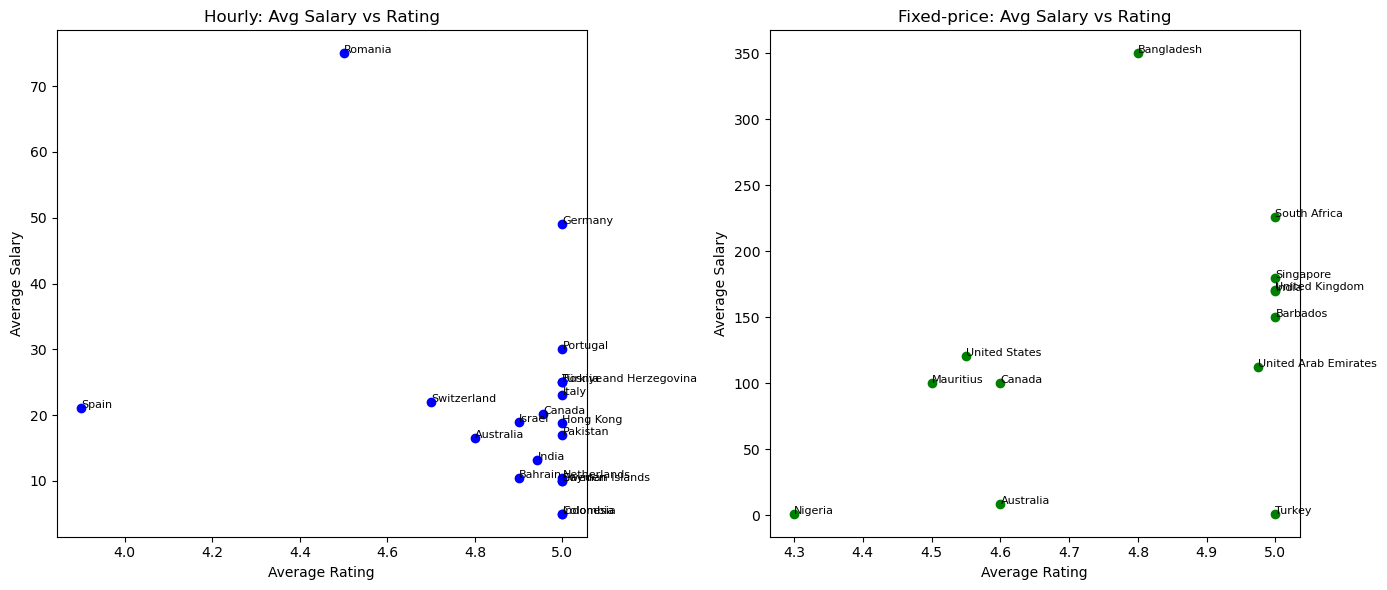

In [19]:
import matplotlib.pyplot as plt

# Group separately by payment type
hourly = jobs[jobs['payment_type'] == 'Hourly'].groupby('location').agg({
    'salary': 'mean',
    'rating': 'mean'
}).dropna().head(20)

fixed = jobs[jobs['payment_type'] == 'Fixed-price'].groupby('location').agg({
    'salary': 'mean',
    'rating': 'mean'
}).dropna().head(20)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot hourly
ax1.scatter(hourly['rating'], hourly['salary'], color='blue')
for country in hourly.index:
    ax1.text(hourly.loc[country, 'rating'],
             hourly.loc[country, 'salary'],
             country, fontsize=8)

# Plot fixed-price
ax2.scatter(fixed['rating'], fixed['salary'], color='green')
for country in fixed.index:
    ax2.text(fixed.loc[country, 'rating'],
             fixed.loc[country, 'salary'],
             country, fontsize=8)

ax1.set(title="Hourly: Avg Salary vs Rating", xlabel="Average Rating", ylabel="Average Salary")
ax2.set(title="Fixed-price: Avg Salary vs Rating", xlabel="Average Rating", ylabel="Average Salary")

plt.tight_layout()
plt.show()


Not all high-paying countries have the best ratings. The sweet spot lies in countries with both **high budgets and high ratings** — these represent the most attractive markets for freelancers. Other regions may pay well but come with lower-rated clients, meaning more risk.  



📌 **Geographic Takeaway:**  
Freelancing opportunities are shaped by geography in multiple ways.  
- The US, UK, and India dominate in job postings.  
- India leads in freelancer supply, creating intense competition.  
- Developed countries pay the highest rates, but also host the most expensive freelancers.  
- Client satisfaction varies, meaning the best opportunities lie not just where the money is, but where clients are also highly rated.  

For freelancers, this means making a choice: **compete in high-volume markets** or **specialize in high-value, high-trust niches**.  


## 🛠 Skills in Demand  

Freelancing success depends on one thing above all: **skills**.  
Companies may define roles, but what they really pay for are the tools and techniques freelancers bring to the table.  
I explored this from three angles:  
1. **Which skills dominate job postings?**  
2. **Do freelancers’ skills match company demand?**  
3. **How do skill priorities shift with experience level?**


#### Which skills dominate job postings?
#### Do freelancers’ skills align with company demand?  

Here I compared the top skills listed in freelancer profiles vs the top skills requested in job postings.  
The goal: *are freelancers positioning themselves with what companies are asking for, or is there a gap?*  


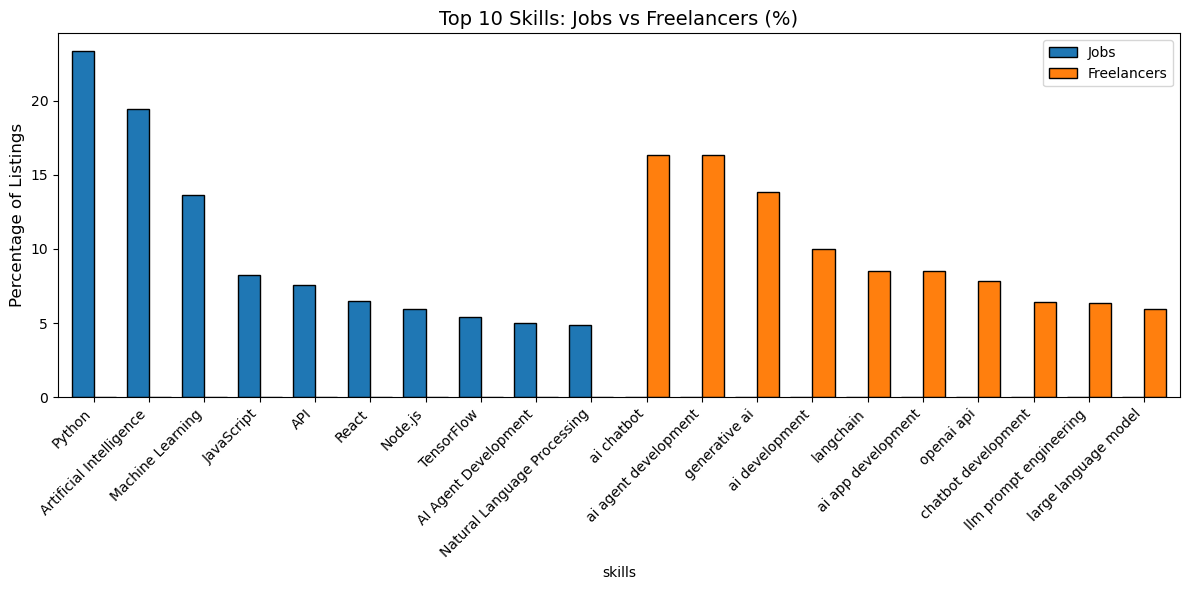

In [20]:
jobs['skills'] = jobs['skills'].apply(
    lambda x: [s.strip() for s in x.split(',')] if isinstance(x, str) else (x if isinstance(x, list) else [])
)
job_skills = jobs['skills'].explode().value_counts().head(10)

# Extract freelancer skills
freelancers['skills'] = freelancers['skills'].apply(
    lambda x: [s.strip().lower() for s in x.split(',')] if isinstance(x, str) else []
)
freelancer_skills = freelancers['skills'].explode().value_counts().head(10)

# Combine into comparison dataframe
skills_compare = pd.concat([
    job_skills.rename("Jobs"),
    freelancer_skills.rename("Freelancers")
], axis=1).fillna(0).astype(int)

# Normalize to percentages for fair comparison
skills_compare_pct = skills_compare.div(skills_compare.sum(axis=0), axis=1) * 100

# Plot side-by-side bars
ax = skills_compare_pct.plot(kind="bar", figsize=(12,6), width=0.8, edgecolor="black")
plt.title("Top 10 Skills: Jobs vs Freelancers (%)", fontsize=14)
plt.ylabel("Percentage of Listings", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


*Observation*:

-On the jobs side, **Python** leads overwhelmingly , followed by **Artificial Intelligence** and **Machine Learning** — clearly showing demand for core AI/ML technical skills.

-Traditional programming languages like **JavaScript** and **API** round out the top requirements, emphasizing full-stack capabilities.

-On the freelancer side, the landscape shifts dramatically — **AI chatbot** and **AI agent development** both hit, suggesting freelancers are positioning themselves around trendy AI applications.

-Freelancers also emphasize **generative AI** and **AI development**, but notably lack the foundational programming skills that jobs demand most.
There's a striking gap: jobs heavily prioritize **Python** and **Machine Learning**, while freelancers focus more on surface-level AI buzzwords and specific applications.

📌 *Takeaway*: Massive skills disconnect — companies want deep technical foundations (Python, ML algorithms), while freelancers market themselves with flashy AI application terms. Freelancers who master the fundamentals that jobs actually request could dominate this underserved market.


### How do skills vary by experience level?  

Finally, I broke down which skills are most common in **entry-level vs expert-level jobs**.  


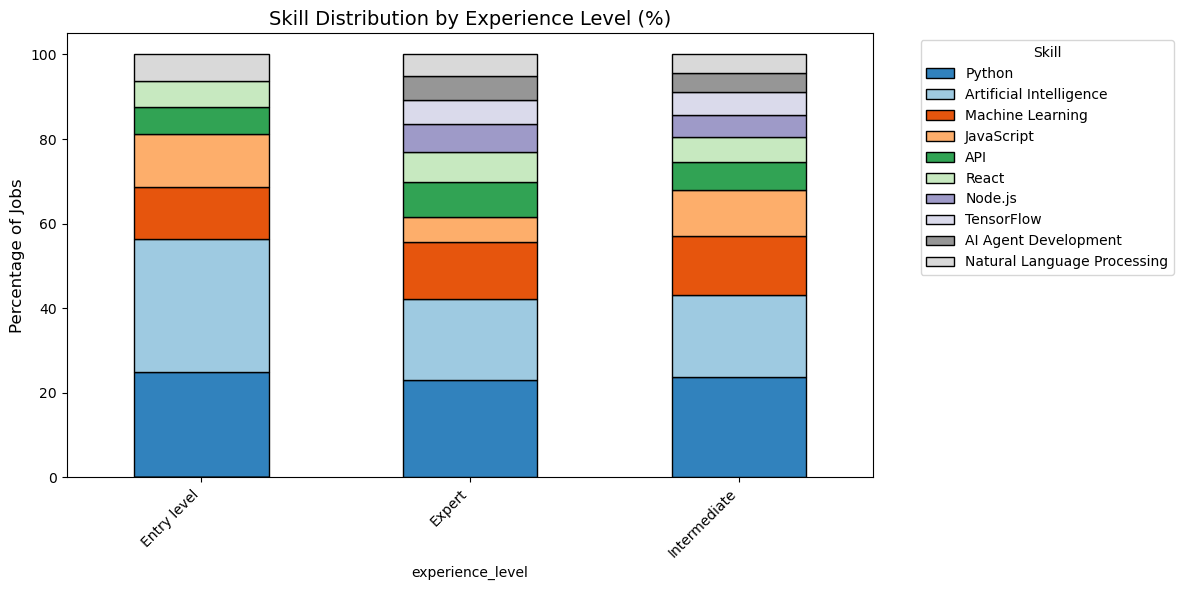

In [21]:
skills_by_exp = jobs.explode('skills').dropna(subset=['skills', 'experience_level'])

skills_by_exp = skills_by_exp[skills_by_exp['skills'].str.strip() != ""]

skill_exp_counts = skills_by_exp.groupby(['experience_level', 'skills']).size().unstack(fill_value=0)

top_skills = skills_by_exp['skills'].value_counts().head(10).index
skill_exp_counts = skill_exp_counts[top_skills]

skill_exp_pct = skill_exp_counts.div(skill_exp_counts.sum(axis=1), axis=0) * 100

skill_exp_pct = skill_exp_pct.apply(pd.to_numeric, errors="coerce").fillna(0)

ax = skill_exp_pct.plot(
    kind="bar", stacked=True, figsize=(12,6),
    colormap="tab20c", edgecolor="black"
)
plt.title("Skill Distribution by Experience Level (%)", fontsize=14)
plt.ylabel("Percentage of Jobs", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Skill", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



*Observation:*  
-Advanced skills emerge at higher levels: *Expert* and *Intermediate* roles show more demand for **TensorFlow**, **AI Agent Development**, and **Natural Language Processing** — skills that require deeper technical expertise.
-*Entry level* has the most concentrated skill distribution, with **Python** + AI making up of all requirements, suggesting clearer, more focused hiring criteria for beginners.

📌 *Takeaway*: Experience-based skill evolution — Entry roles focus on Python + AI fundamentals, while senior roles diversify into specialized areas like advanced ML frameworks and agent development. Junior developers should master the basics, while experienced practitioners should differentiate through specialized AI/ML tools. 


### What are the most used Skills in each experience level?

KeyError: 'earning_tier'

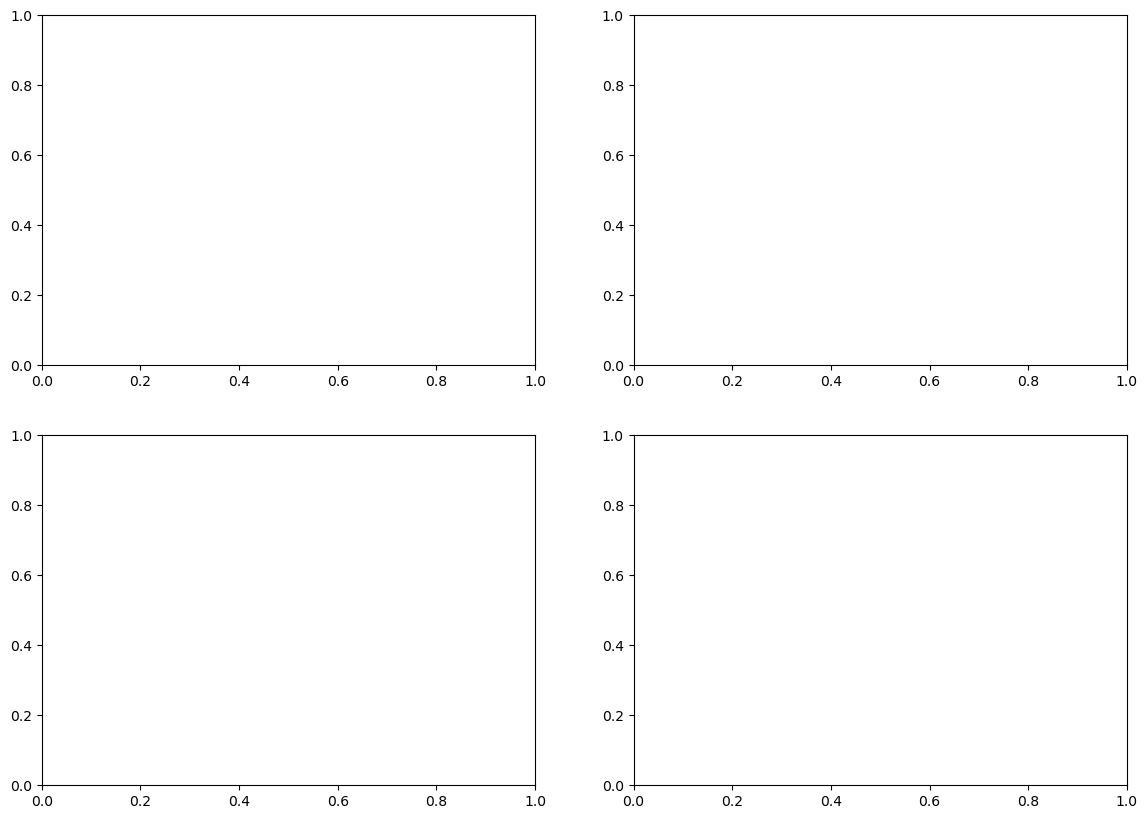

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))  
axes = axes.flatten()

for i, tier in enumerate(freelancers['earning_tier'].dropna().unique()):
    tier_skills = freelancers[freelancers['earning_tier'] == tier]['skills'].explode().str.strip().str.lower()
    tier_counts = tier_skills.value_counts().head(7)
    
    tier_counts.plot(
        kind='bar', ax=axes[i], 
        color="teal", edgecolor="black"
    )
    axes[i].set_title(f"Top Skills – {tier}", fontsize=12)
    axes[i].set_ylabel("Number of Freelancers")
    axes[i].set_xlabel("Skills")
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("Top Freelancer Skills by Earning Tier", fontsize=16, weight="bold")
plt.tight_layout(rect=[0,0,1,0.97])
plt.show()


All levels have almost the same skills this shows that as professional AI engineer it's not about having too many skills, it's about having the right skills with in-depth understanding and experience

## 💵 Salary Patterns  

Compensation is where company expectations meet freelancer ambitions.  
By looking at both job postings and freelancer profiles, we can see: 

1. **What’s the typical budget for hourly vs fixed-price jobs?**  
2. **How does experience affect salaries for each contract type?**  
3. **How do freelancer rates compare with company budgets?**  
4. **How much does salary vary at each experience level?**  

### What is the Average Budget?  

Comparing hourly vs fixed-price budgets across postings shows how companies structure their pay.  


In [ ]:
Hourly = jobs.loc[jobs['payment_type'] == 'Hourly', 'salary']
Fixed_price = jobs.loc[jobs['payment_type'] == 'Fixed-price', 'salary']
fig, ax = plt.subplots(figsize=(7, 5))

ax.boxplot([Hourly.dropna(), Fixed_price.dropna()],
           tick_labels=["Hourly", "Fixed-price"],
           patch_artist=True,
           boxprops=dict(facecolor="lightblue"),
           medianprops=dict(color="red"))

ax.set_facecolor('lightgray')
ax.set_yscale("asinh")
ax.set_ylabel("Salary (scaled)")
ax.set_title("Salary Distribution: Hourly vs Fixed-price")

# Show averages as horizontal lines
ax.hlines(np.mean(Hourly), xmin=0.8, xmax=1.2, colors="blue", linestyles="--", label=f"Hourly Avg: {round(np.mean(Hourly))}")
ax.hlines(np.mean(Fixed_price), xmin=1.8, xmax=2.2, colors="orange", linestyles="--", label=f"Fixed Avg: {round(np.mean(Fixed_price))}")
ax.legend()

plt.show()



**Observations:**  
- Hourly contracts cluster tightly around lower values — stable and predictable.  
- Fixed-price contracts stretch much wider, with higher upside.  
- On average, fixed contracts skew higher, suggesting bigger budgets for projects requiring full delivery.  

📌 *Takeaway:* Hourly = stability, Fixed = volatility with higher ceiling.  



### How does experience affect salary by contract type?  

Breaking budgets down by experience level reveals career progression patterns.  


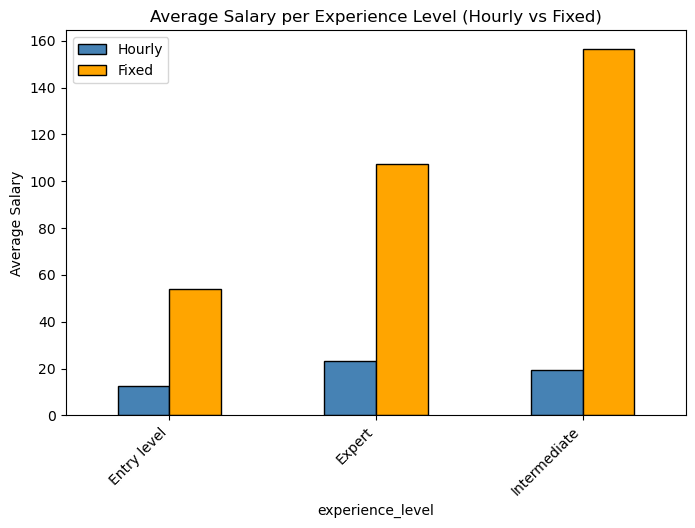

In [23]:
hourly_experience_level = jobs[jobs['payment_type'] == 'Hourly'].dropna(subset=['experience_level'])
fixed_experience_level  = jobs[jobs['payment_type'] == 'Fixed-price'].dropna(subset=['experience_level'])

hourly_experience_level_mean = hourly_experience_level.groupby('experience_level')['salary'].mean().sort_values(ascending= False).dropna().head(10)
fixed_experience_level_mean = fixed_experience_level.groupby('experience_level')['salary'].mean().sort_values(ascending= False).dropna().head(10)

salary_exp_compare = pd.DataFrame({
    "Hourly": hourly_experience_level.groupby('experience_level')['salary'].mean(),
    "Fixed": fixed_experience_level.groupby('experience_level')['salary'].mean()
})

salary_exp_compare.plot(kind="bar", figsize=(8,5), color=["steelblue","orange"], edgecolor="black")
plt.title("Average Salary per Experience Level (Hourly vs Fixed)")
plt.ylabel("Average Salary")
plt.xticks(rotation=45, ha="right")
plt.show()



**Observations:**  
- Hourly rates rise steadily with experience — experts clearly command higher pay.  
- Fixed-price peaks at intermediate level — companies see them as the sweet spot: skilled yet affordable.  

📌 *Takeaway:* Intermediates often get the **largest projects**, experts the **specialized ones**.  


### Do freelancer rates align with company budgets?  

Here we compare **freelancer hourly rates** (from their profiles) with **company hourly budgets**.  


C:\Users\DELL\AppData\Local\Temp\ipykernel_12756\3420424860.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freelancer_hourly_tier = freelancers.groupby('earning_tier')['rate_per_hour'].mean()


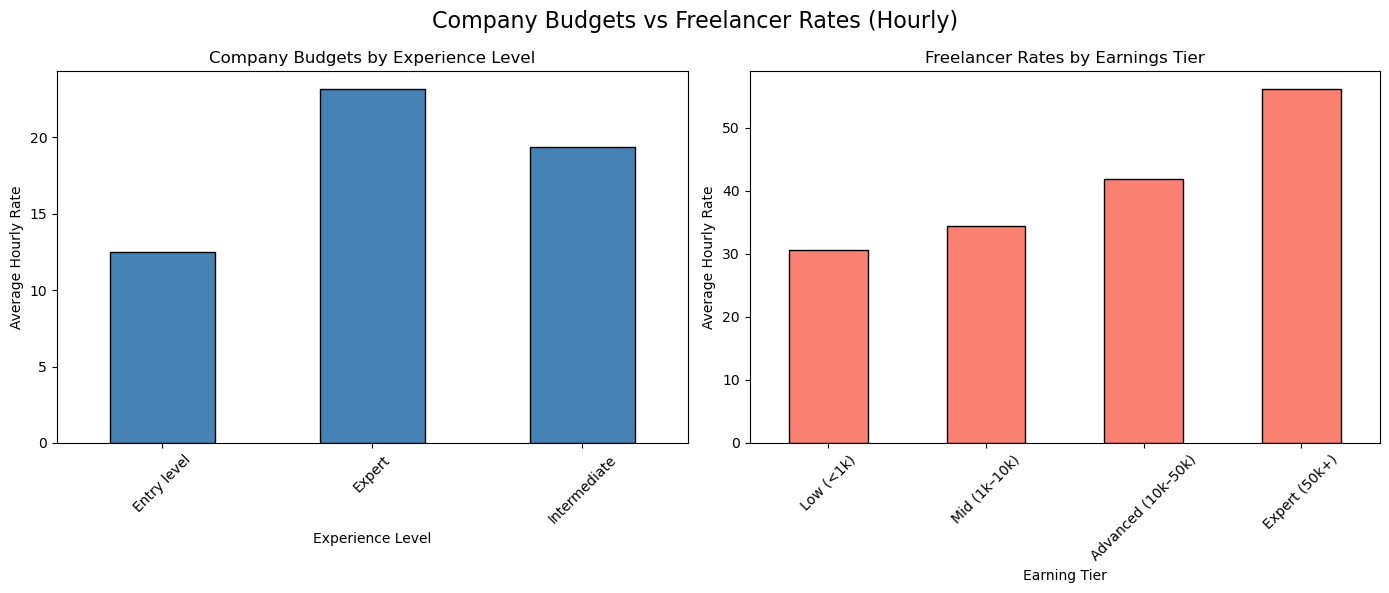

In [25]:
freelancers['rate_per_hour'] = pd.to_numeric(freelancers['rate_per_hour'], errors='coerce')

freelancers['total_earnings'] = (
    freelancers['total_earnings']
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)   # keep digits only
    .replace('', '0').astype(int)
)
bins = [0, 1000, 10000, 50000, freelancers['total_earnings'].max()]
labels = ["Low (<1k)", "Mid (1k–10k)", "Advanced (10k–50k)", "Expert (50k+)"]
freelancers['earning_tier'] = pd.cut(freelancers['total_earnings'], bins=bins, labels=labels, include_lowest=True)

company_hourly_exp = hourly_experience_level.groupby('experience_level')['salary'].mean()

freelancer_hourly_tier = freelancers.groupby('earning_tier')['rate_per_hour'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

company_hourly_exp.plot(kind="bar", color="steelblue", edgecolor="black", ax=ax1)
ax1.set_title("Company Budgets by Experience Level")
ax1.set_ylabel("Average Hourly Rate")
ax1.set_xlabel("Experience Level")
ax1.tick_params(axis="x", rotation=45)

# Plot freelancers
freelancer_hourly_tier.plot(kind="bar", color="salmon", edgecolor="black", ax=ax2)
ax2.set_title("Freelancer Rates by Earnings Tier")
ax2.set_ylabel("Average Hourly Rate")
ax2.set_xlabel("Earning Tier")
ax2.tick_params(axis="x", rotation=45)

plt.suptitle("Company Budgets vs Freelancer Rates (Hourly)", fontsize=16)
plt.tight_layout()
plt.show()



**Observation:**  
- Companies scale budgets by **experience level of jobs** (Entry → Intermediate → Expert).  
- Freelancers increase their rates by **proven earnings tier** (Low → Expert earners).  
- The two don’t align perfectly — companies think in terms of *role difficulty*, freelancers think in terms of *track record*.  
- This mismatch explains why some freelancers struggle to land jobs despite high rates: their personal history doesn’t always map onto how companies define experience.  

📌 *Takeaway:* Freelancers should be aware that clients judge value by **role** more than by **past earnings**. Positioning skills to match job-level expectations is key.  



### How much does salary vary at each experience level?  

Finally, boxplots reveal the **spread of salaries** by experience.  


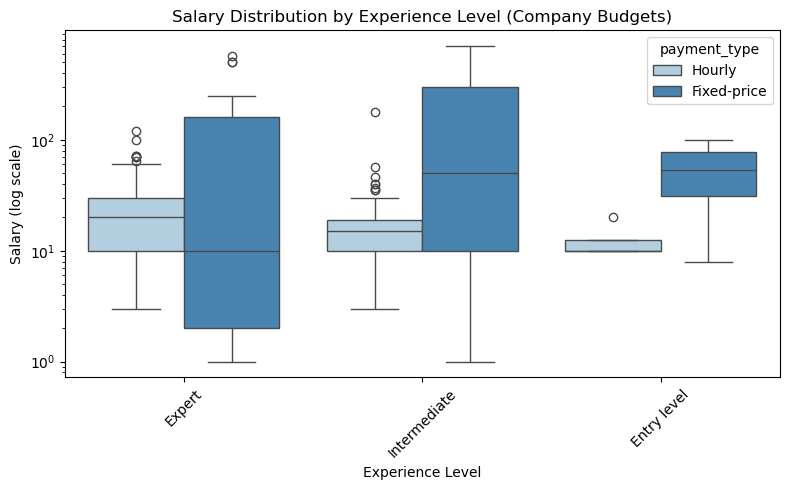

In [26]:
salary_by_exp = jobs.dropna(subset=['experience_level', 'salary'])

fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(
    data=salary_by_exp, 
    x="experience_level", 
    y="salary", 
    palette="Blues", 
    hue = "payment_type",
    showfliers=True,
    ax=ax
)

ax.set_title("Salary Distribution by Experience Level (Company Budgets)")
ax.set_ylabel("Salary (log scale)")
ax.set_xlabel("Experience Level")
ax.set_yscale("log")
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()



**Observations:**  
- Entry-level = predictable, clustered low.  
- Intermediate = widest spread, covering both mid-sized and high-budget jobs.  
- Expert = higher hourly rates, meaning reputation drives the premium.  

📌 *Takeaway:* The real volatility lives in **intermediate contracts**, where some projects are small, others are huge.  


## Ratings & Companies

In freelancing, success depends not only on skills and contracts but also on who you work with.
Some companies offer great pay but poor freelancer satisfaction, while others are rated highly for collaboration.
On the flip side, freelancers also differ — those charging more may only work with trusted clients.

This section explores how company ratings and freelancer dynamics shape opportunities.

#### What percentage of jobs are Hourly vs Fixed?
#### Do high-rated companies prefer Hourly or Fixed?

- Before diving deeper, we start with the basics: is the freelancing market built more on hourly collaborations or on fixed-price projects?
- A logical next question: do the best-rated companies (those freelancers want to work with) lean more toward hourly or fixed-price contracts?

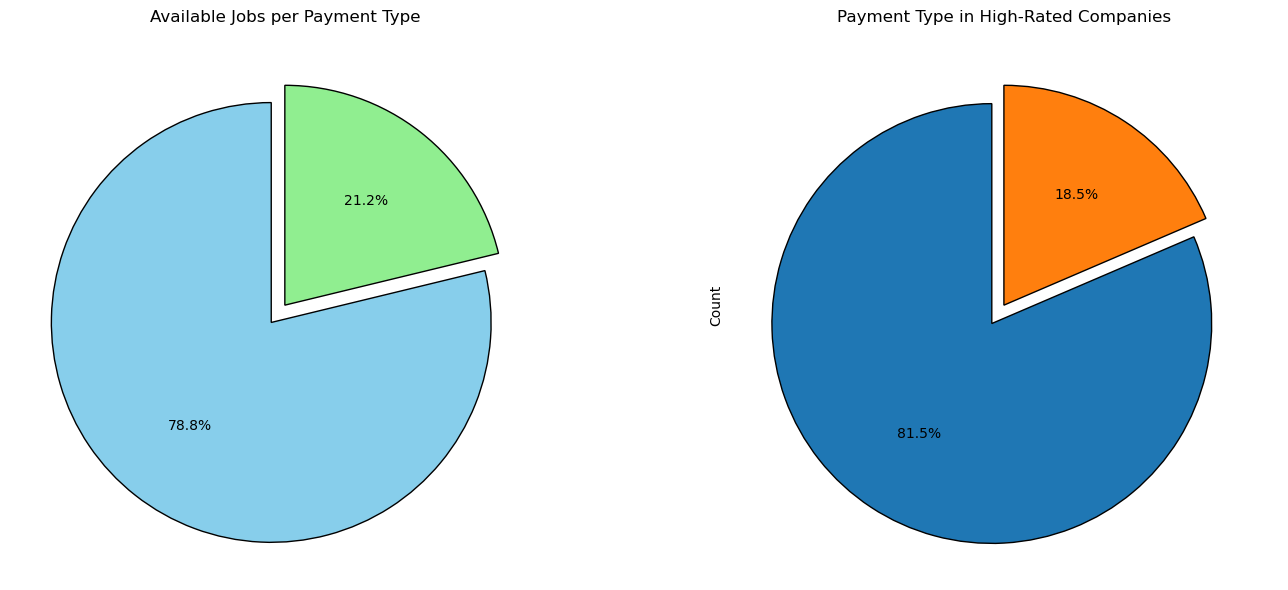

In [93]:
high_rated = jobs[jobs['rating'] >= 4.9]
payment_counts = high_rated['payment_type'].value_counts()
job_payment = jobs['payment_type'].value_counts()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1.pie(job_payment, autopct='%1.1f%%', startangle=90 ,explode = (0.1,0), colors=["skyblue", "lightgreen"],wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
ax1.set_title("Available Jobs per Payment Type")

ax2.pie(payment_counts, autopct='%1.1f%%', startangle=90, explode = (0.1,0), wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
#ax2.bar(payment_counts.index, payment_counts.values, color=['skyblue', 'salmon'])
ax2.set_title("Payment Type in High-Rated Companies")
ax2.set_ylabel("Count")

plt.tight_layout()
plt.show()

- Hourly contracts make up nearly 80% of all jobs.
This dominance shows that freelancing is built on continuous work and collaboration, rather than small, one-off fixed projects.
For freelancers starting out, this means most opportunities will be hourly.
- High-rated companies strongly prefer hourly contracts, reflecting their interest in long-term partnerships rather than quick, transactional projects.
Still, fixed-price projects remain relevant — even trusted clients use them when tasks are clearly defined and scoped.

#### Are top tier Freelancer often associate with companies?
some freelancer tend to work in a team maybe called "solution companies"

C:\Users\DELL\AppData\Local\Temp\ipykernel_12756\1943866508.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_company = freelancers.groupby('earning_tier')['is_associated_with_company'].value_counts().unstack().fillna(0)


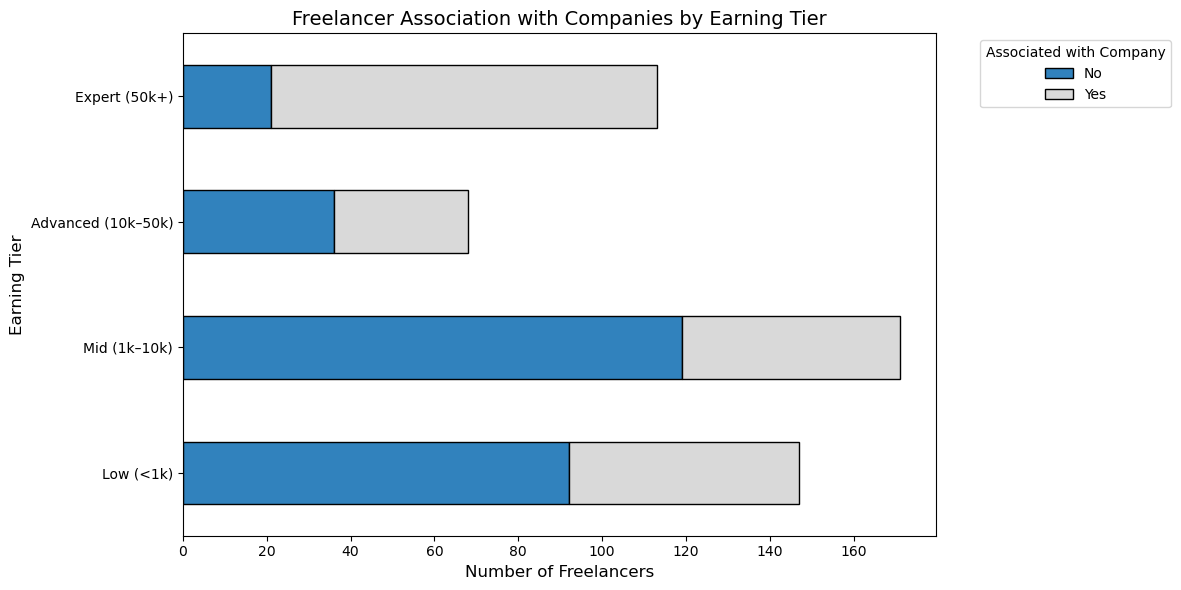

In [26]:
# Count freelancers by earning tier and association status
exp_company = freelancers.groupby('earning_tier')['is_associated_with_company'].value_counts().unstack().fillna(0)

# Plot stacked horizontal bars
ax = exp_company.plot(
    kind="barh", stacked=True, figsize=(12,6),
    colormap="tab20c", edgecolor="black"
)

plt.title("Freelancer Association with Companies by Earning Tier", fontsize=14)
plt.xlabel("Number of Freelancers", fontsize=12)
plt.ylabel("Earning Tier", fontsize=12)

# Add legend
plt.legend(title="Associated with Company", labels=["No", "Yes"], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


*Experts tend to work in teams this explains their high earnings due to working with a team accelarate getting the job done.*

#### Which countries have the best-rated companies?

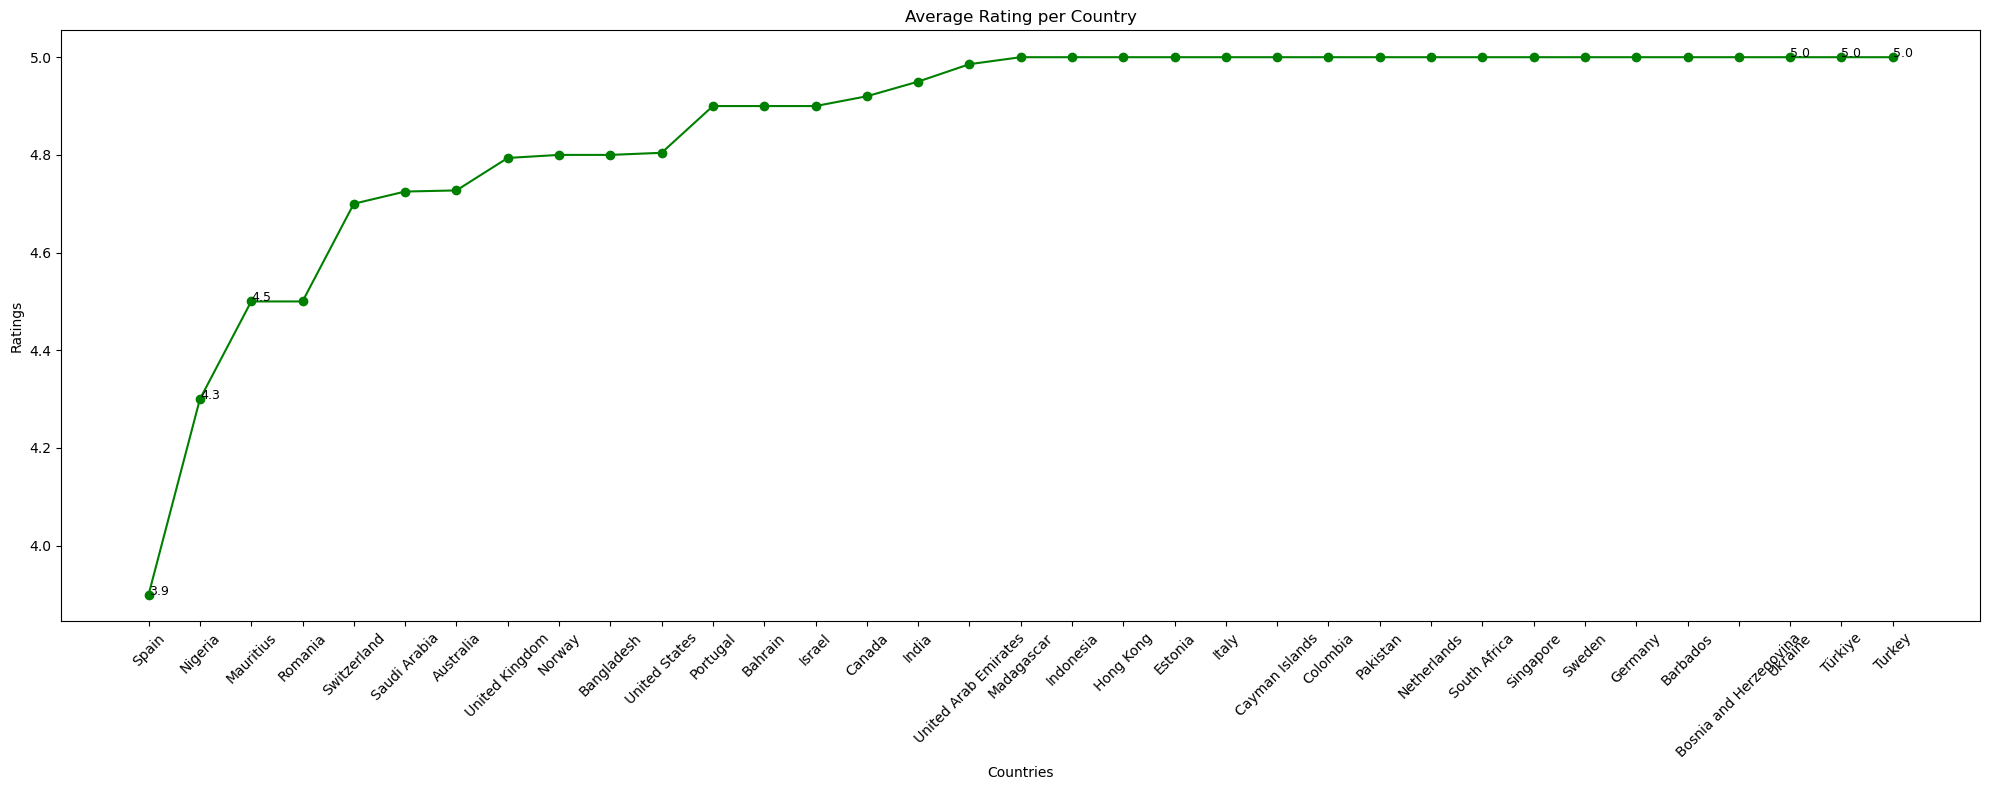

In [30]:
filtered = jobs.dropna(subset=['rating'])
top_ratings_countries = filtered.groupby('location')['rating'].mean().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(top_ratings_countries.index, top_ratings_countries.values, marker="o", color="green")
ax.set(title="Average Rating per Country", xlabel="Countries", ylabel="Ratings")
ax.tick_params(axis='x', rotation=45)

for country in list(top_ratings_countries.head(3).index) + list(top_ratings_countries.tail(3).index):
    ax.text(country, top_ratings_countries[country], f"{round(top_ratings_countries[country],2)}", fontsize=9)

fig.tight_layout()
plt.show()


Not all high-paying regions have the best ratings. Some countries combine strong pay and good freelancer satisfaction, while others pay well but score lower in trust. Freelancers should weigh earning potential vs client quality when choosing markets.

### 🚀 Conclusion: Building an AI Freelance Career  

This analysis shows that the AI freelance market is both promising and competitive:  

- **Skills**: Python, AI, and ML are the essential toolkit. Supporting skills (e.g., JavaScript, APIs) help bridge modeling and deployment.  
- **Geography**: Opportunities cluster in the US, UK, and India, but remote work ensures global access.  
- **Contracts**: Hourly dominates and is the entry point, while fixed-price projects unlock higher earning potential as freelancers gain trust.  
- **Experience**: There’s room for newcomers, but the steepest salary growth happens as you move from entry-level → intermediate.  
- **Clients**: High-rated companies prefer hourly contracts, valuing collaboration, while fixed contracts remain important for defined projects.  

 **Actionable Takeaway:**  
For someone starting an AI freelance career, the best path is:  
1. **Master Python + ML fundamentals.**  
2. **Begin with Fixed entry-level projects** to build reputation and client trust.  
3. **Transition to Hourly jobs** that showcase full ownership of solutions.  
4. **Layer in specialized skills** (like AI frameworks or deployment tools) to unlock higher pay.  


## Appendix

### Freelanceing Beasts
This section is concerned with those top 1% freelancers. I am going to visualize some charts on freelancers that total earnings exceeded 500,000 to see what does they have that make them distiguishable than others? Is it their different skills? Is it their Advanced teams? let's see.

#### What is common in the top freelancers?
I want to know what is a must that every top freelancer should have to get there.                                                                        
Do they all have high rate per hour? or do they come from one country? 

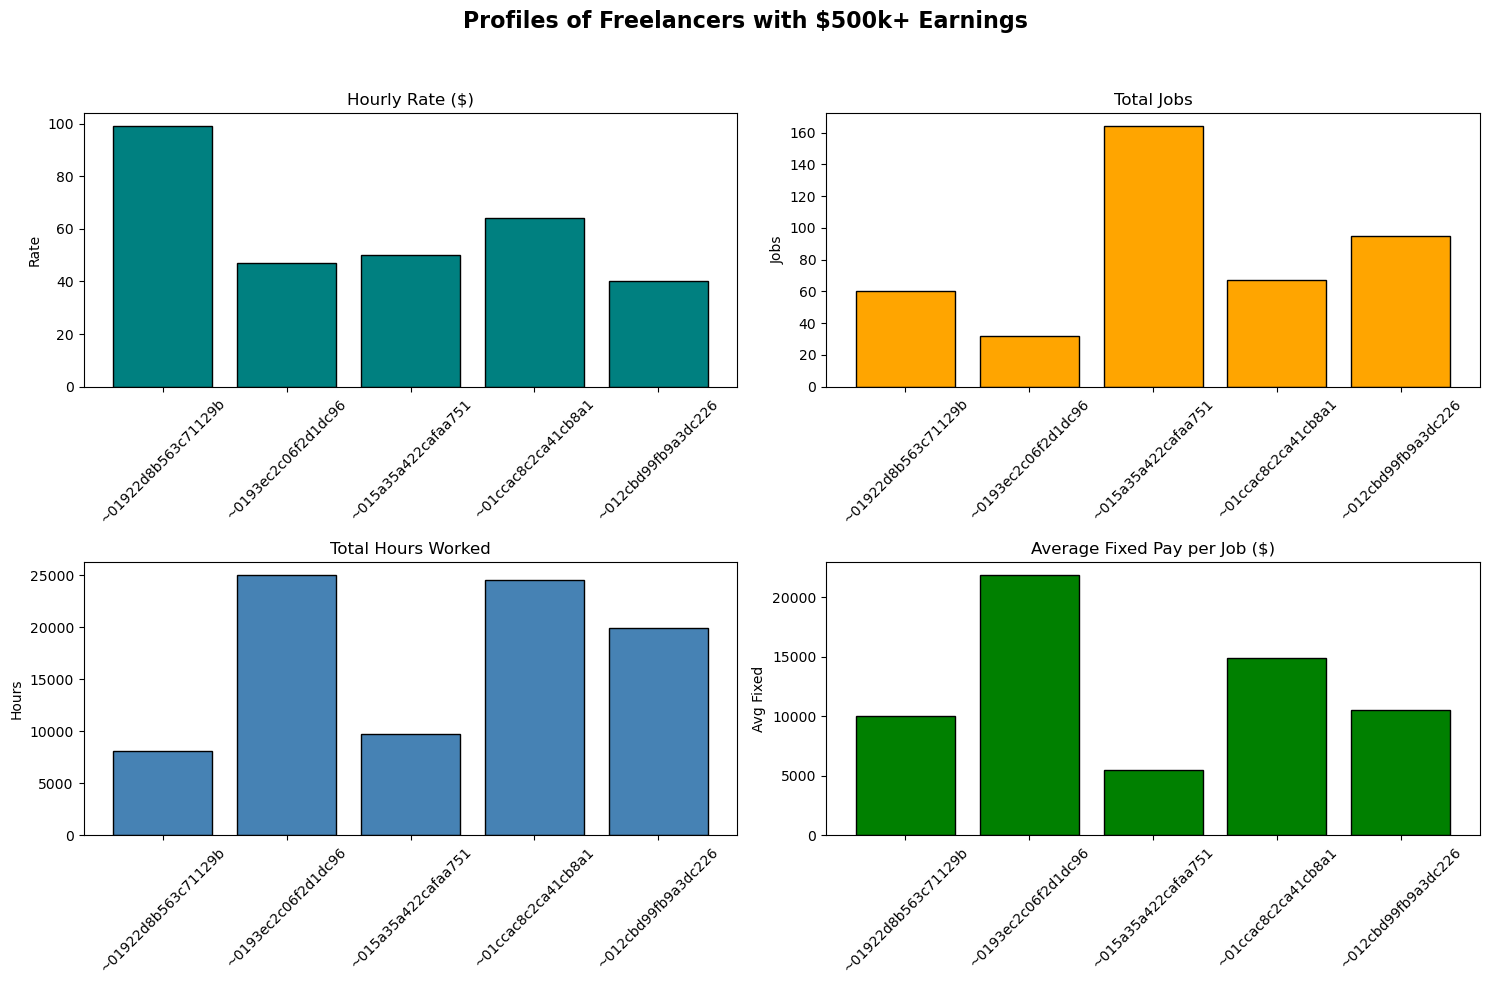

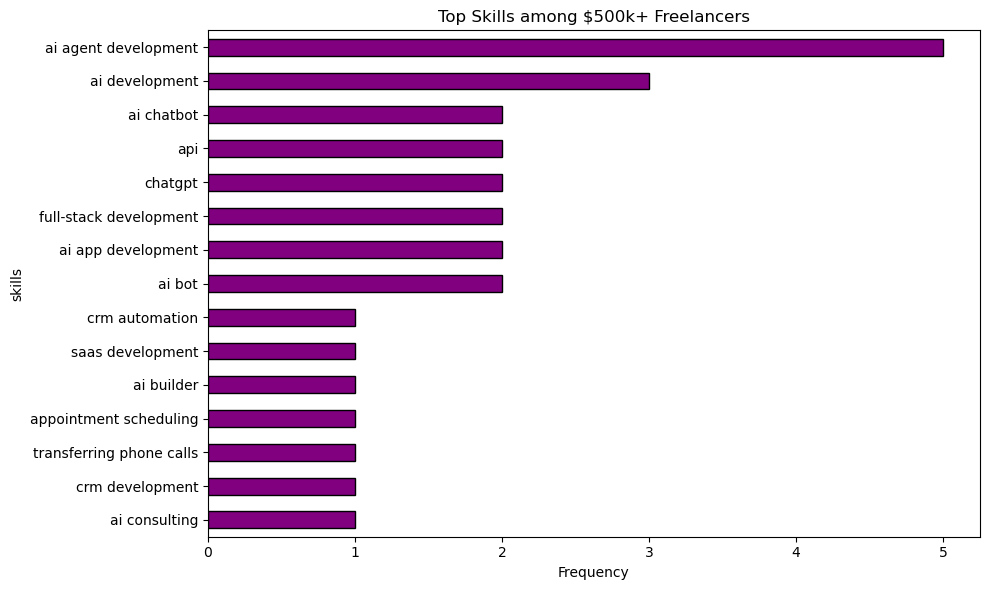

In [97]:
top_earners = freelancers[freelancers["total_earnings"] > 500000].copy()

fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("Profiles of Freelancers with $500k+ Earnings", fontsize=16, weight="bold")

# Hourly rate
axes[0,0].bar(top_earners['ID'], top_earners['rate_per_hour'], color="teal", edgecolor="black")
axes[0,0].set_title("Hourly Rate ($)")
axes[0,0].set_ylabel("Rate")
axes[0,0].tick_params(axis='x', rotation=45)

# Total jobs
axes[0,1].bar(top_earners['ID'], top_earners['total_jobs'], color="orange", edgecolor="black")
axes[0,1].set_title("Total Jobs")
axes[0,1].set_ylabel("Jobs")
axes[0,1].tick_params(axis='x', rotation=45)

# Total hours
axes[1,0].bar(top_earners['ID'], top_earners['total_hours'], color="steelblue", edgecolor="black")
axes[1,0].set_title("Total Hours Worked")
axes[1,0].set_ylabel("Hours")
axes[1,0].tick_params(axis='x', rotation=45)

# Avg fixed per job
axes[1,1].bar(top_earners['ID'], top_earners['avg_fixed_per_job'], color="green", edgecolor="black")
axes[1,1].set_title("Average Fixed Pay per Job ($)")
axes[1,1].set_ylabel("Avg Fixed")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

all_top_skills = top_earners['skills'].explode().str.strip().str.lower().value_counts().head(15)

fig, ax = plt.subplots(figsize=(10,6))
all_top_skills.plot(kind="barh", color="purple", edgecolor="black", ax=ax)
ax.set_title("Top Skills among $500k+ Freelancers")
ax.set_xlabel("Frequency")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


- Their hourly rate varies from *`40$/hr`  to  `100$/hr`* which is a huge gap. this means that your rate per isn't what make you a top tier freelancer.
- It's not total jobs either some freelancers work a big number of jobs maybe less time and less total payment and others make a little number of jobs with many hours in.
- Maybe skills because all of them do ai agent development , but also it's maybe 1 or 2 skills that are common which make it unlikely.
- As it's said "consistency is the key" all of them worked 8000+ hours which is huge number

*Conlusion* : It's not about anything than consistency that top tier freelancers. Those top 1% put in a lot of hours of hard work to get to where they are now


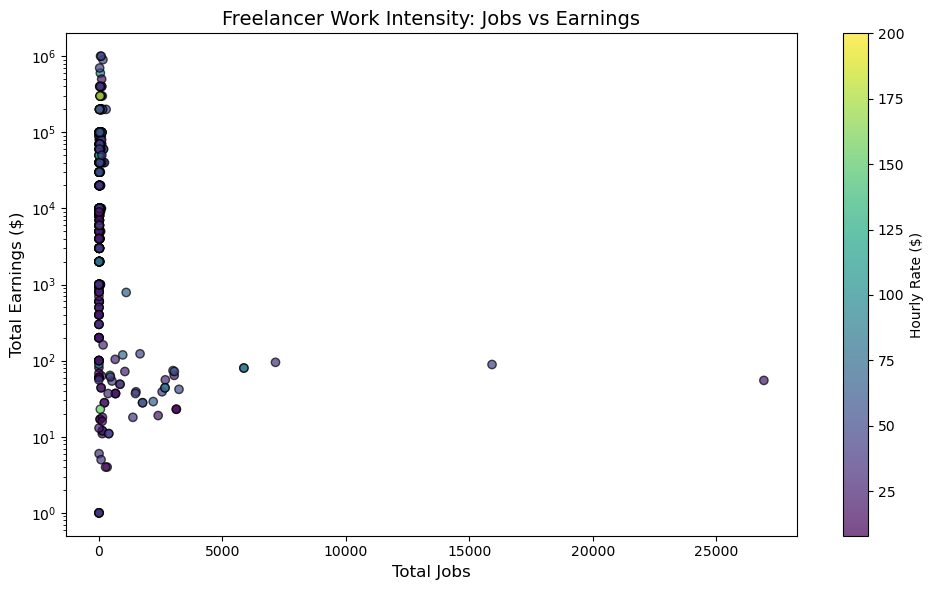

In [98]:
# --- Work Intensity: Jobs vs Earnings ---
fig, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(
    freelancers['total_jobs'], freelancers['total_earnings'],
    c=freelancers['rate_per_hour'], cmap="viridis", alpha=0.7, edgecolor="k"
)

ax.set_title("Freelancer Work Intensity: Jobs vs Earnings", fontsize=14)
ax.set_xlabel("Total Jobs", fontsize=12)
ax.set_ylabel("Total Earnings ($)", fontsize=12)
ax.set_yscale("log")

# Add colorbar for hourly rate
cbar = plt.colorbar(scatter)
cbar.set_label("Hourly Rate ($)")

plt.tight_layout()
plt.show()
